<a href="https://colab.research.google.com/github/PrathameshMore777/LendingClubCaseStudy/blob/LendingCCS-1.0/LendingClubAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Importing Required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Loading Data
loan_data = pd.read_csv('/home/loan.csv')
loan_dd = pd.read_excel('/home/Data_Dictionary.xlsx')

In [36]:
#Display limit removed for dataframe and configured style for seaonrn
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [37]:
# Data_Dictionary.xlsx 5 rows output
loan_dd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [38]:
# Loan.csv 5 rows output
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [40]:
#Data info for first step exploring
print('Total No.of Columns:',loan_data.shape[1])
print('Total No.of Rows:',loan_data.shape[0])
print('Total No.of Missing Values:',loan_data.isnull().sum().sum())
print('Total No.of Unique Values:',loan_data.nunique().sum())
print('Total No.of Duplicates:',loan_data.duplicated().sum())

Total No.of Columns: 111
Total No.of Rows: 39717
Total No.of Missing Values: 2263364
Total No.of Unique Values: 416801
Total No.of Duplicates: 0


In [42]:
# Dataframe Info
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [44]:
# Column Datatype Info
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [47]:
# Dataframe description for Data Cleaning reference
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [48]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [49]:
# Missing Values Details
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [51]:
# Calculating % in which column there is large amount of null/missing values values
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [52]:
#Before Deletion of Columns
print(loan_data.shape)

(39717, 111)


In [53]:
# Deleting Columns where null values are morethan 50%
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Post Deletion of Columns
print(loan_data.shape)

(39717, 54)


In [54]:
# Recheck for the null values if we removed more than 50% or not
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [55]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [56]:
# Now check for missing values in rows
print((loan_data.isnull().sum(axis=1)).max())

6


In [57]:
#Before removing irrelevant columns
print(loan_data.shape)

(39717, 54)


In [58]:
#Getting rid of columns which are not relevant for loan defaulters.
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
loan_data=loan_data.drop(['title','emp_title','desc','url','zip_code','member_id','funded_amnt_inv'],axis=1)
#Post removing irrelevant columns
print(loan_data.shape)

(39717, 26)


In [59]:
#Find for unique values count in columns and delete the columns with less no so it will not impact the analysis
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [60]:
#Before removing min unique values
print(loan_data.shape)

(39717, 26)


In [61]:
# Deleting columns with 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
#After removing min unique values
print(loan_data.shape)

(39717, 18)


In [62]:
# Dataframe Column Details
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [63]:
#if possible Remove/Fix null values of the columns with respective to objective of analysis
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [64]:
#emp_length can be removed/fixed as it hold the null values.
print(loan_data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [65]:
#pub_rec_bankruptcies can be removed/fixed as it hold the null values.
print(loan_data.pub_rec_bankruptcies.value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [67]:
# Before deleting null values from emp_length
print(loan_data.shape)

(39717, 18)


In [68]:
#Removing the null values from emp_length will not have much impact so we will delete the null values from column
loan_data = loan_data.dropna(subset=['emp_length'])
# After deleting null values from emp_length
print(loan_data.shape)

(38642, 18)


In [69]:
#for pub_rec_bankruptcies column we can replace the null values with 0
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [70]:
#Check missing/null values from dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [71]:
print(loan_data.shape)

(38642, 18)


In [72]:
# before removing duplicate rows
print(loan_data.shape)

(38642, 18)


In [73]:
#Remove duplicate rows from columns
loan_data = loan_data.drop_duplicates()
# After removing duplicate rows
print(loan_data.shape)

(38642, 18)


In [74]:
#Dataframe Info
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [75]:
#Fixing datatype and format in dataframe column
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['year_issued']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['month_issued']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [78]:
# decimal limit
for p in loan_data.columns:
    if(loan_data[p].dtype=='float64'):
      loan_data[p]=loan_data[p].round(2)
      
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,year_issued,month_issued
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


In [79]:
#filtering values where loan_status is not current as we need to check for cust which will default
loan_data = loan_data[loan_data.loan_status!='Current']
#after deleting current status values from loan_status columns
print(loan_data.shape)

(37544, 20)


In [81]:
#Segregate columns as per categorical and numerical
category_column = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
numerical_column =['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_column=['id']
status_column=['loan_status']

In [96]:
#Remove outliers
px.box(loan_data,x='loan_amnt',width=550,height=250,title='Loan Amount',labels={'loan_amnt':'Loan_Amount'}).show()
px.box(loan_data,x='int_rate',width=550,height=250,title='Interest Rate',labels={'int_rate':'Interest_Rate'}).show()
px.box(loan_data,x='annual_inc',width=550,height=250,title='Borrowers Annual Income',labels={'annual_inc':'Annual_Income'}).show()
px.box(loan_data,x='dti',width=550,height=250,title='Debt To Income Ratio',labels={'dti':'DTI_Ratio'}).show()
px.line(sorted(loan_data.annual_inc),width=550,height=250,title='Annual Income Trend',labels={'value':'Annual_Income','index':'Position'}).show()


In [88]:
#As per observation the annual income trend is growing exponentialy so we will remove the values greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

In [90]:
px.line(sorted(loan_data.annual_inc),width=550,height=250,title='Annual Income Trend',labels={'value':'Annual_Income','index':'Position'}).show()

**The Data has been filtered cleaned at this stage**

Fully Paid     85.580932
Charged Off    14.419068
Name: loan_status, dtype: float64


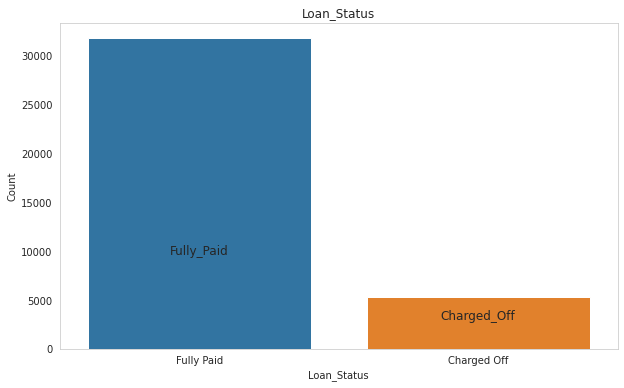

In [160]:
# Loan Info
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0 is Fully Paid, 1 is Charged Off
plt.figure(figsize=(10,6))
ax=sns.countplot(loan_data.loan_status)
ax.annotate('Fully_Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged_Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan_Status')
ax.set_xlabel('Loan_Status')
ax.set_ylabel('Count')
plt.show()

**Conclusion:** Loan Defaulters are less as compared to charged of candidates

In [161]:
# Info about loan amount
print(loan_data.loan_amnt.describe())
# Histogram for loan amount
px.box(loan_data,x='loan_amnt',width=550,height=250,title='Loan_Amount',labels={'loan_amnt':'Loan_Amount'}).show()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


**Conclusion:** The range of loan is from 500 to 35K with median 9800

36    75.37729
60    24.62271
Name: term, dtype: float64


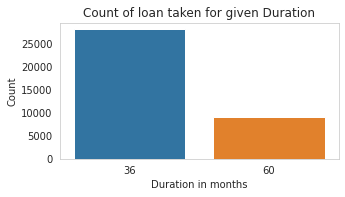

In [125]:
# Loan Duration 
print(loan_data.term.value_counts()*100/loan_data.term.count())
plt.figure(figsize=(5,2.5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Duration')
ax.set_xlabel('Duration in months')
ax.set_ylabel('Count')
plt.show()

**Conclusion:** Maximun Loan is taken for duration 3 years

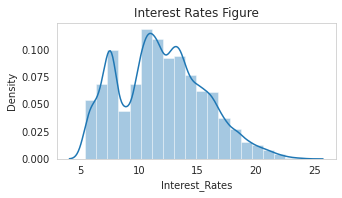

In [169]:
# Interest rate
plt.figure(figsize=(5,2.5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest_Rates')
plt.ylabel('Density')
plt.title('Interest Rates Figure')
plt.show()

**Conclusion:** 5-10 and 10-15 % interest rates are more common with fall in 10

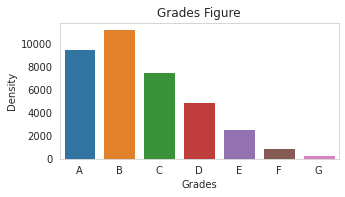

In [170]:
# Grades
plt.figure(figsize=(5,2.5))
sns.countplot(loan_data.grade)
plt.xlabel('Grades')
plt.ylabel('Density')
plt.title('Grades Figure')
plt.show()

**Conclusion:** A and B grade is holding high amount of loan

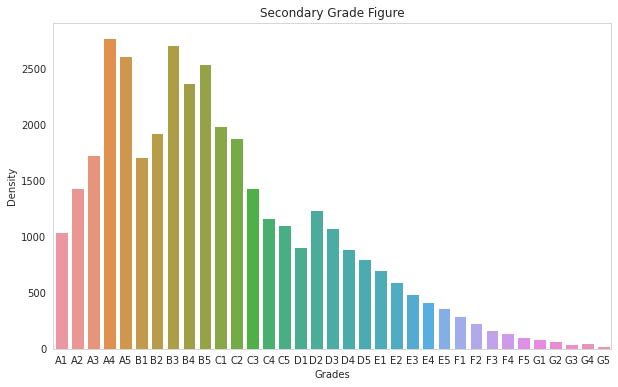

In [171]:
# Secondary Grades
plt.figure(figsize=(10,6))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grades')
plt.ylabel('Density')
plt.title('Secondary Grade Figure')
plt.show()

**Conclusion:** Large amount of loans are there with subgroup of A and B as compared to rest groups

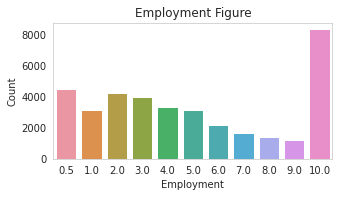

In [172]:
# Employment
plt.figure(figsize=(5,2.5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment')
plt.ylabel('Count')
plt.title('Employment Figure',fontsize=12)
plt.show()

**Conclusion:** Borrowers with 10 years of experiance tend to have more loan than other exp groups

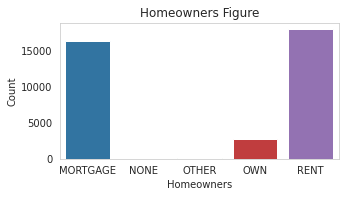

In [173]:
# Homeowners
plt.figure(figsize=(5,2.5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Homeowners')
plt.ylabel('Count')
plt.title('Homeowners Figure',fontsize=12)
plt.show()

**Conclusion:** Owners of the house seems to take less loan than other rented and mortgage borrowers

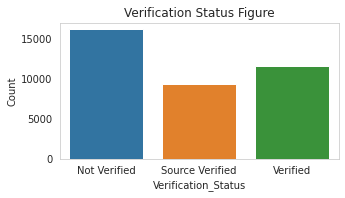

In [174]:
# Verification Status
plt.figure(figsize=(5,2.5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification_Status')
plt.ylabel('Count')
plt.title('Verification Status Figure',fontsize=12)
plt.show()

**Conclusion:** Almost 50% of company are verified or have verfied source

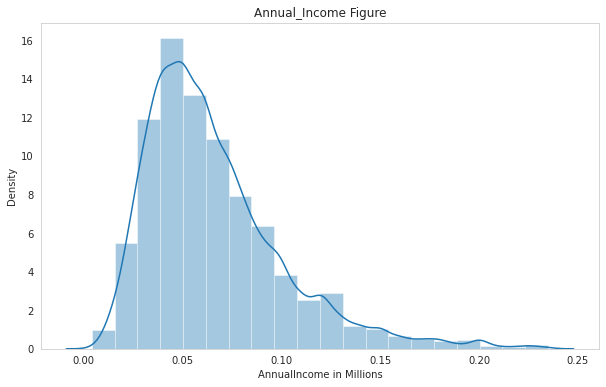

In [202]:
# AnnualIncome
plt.figure(figsize=(10,6))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('AnnualIncome in Millions')
plt.ylabel('Density')
plt.title('Annual_Income Figure',fontsize=12)
plt.show()

**Conclusion:** low income group tend to have more loans than higher income group

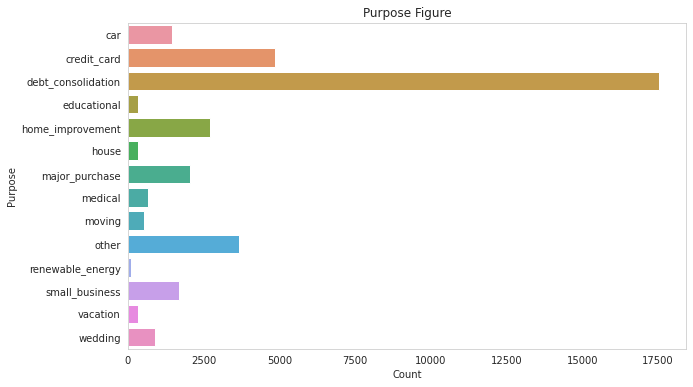

In [177]:
# Distribution of purpose
plt.figure(figsize=(10,6))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Purpose Figure',fontsize=12)
plt.show()

**Conclusion:** Majority of debt_consolidation and credit_card are the reasons for loan

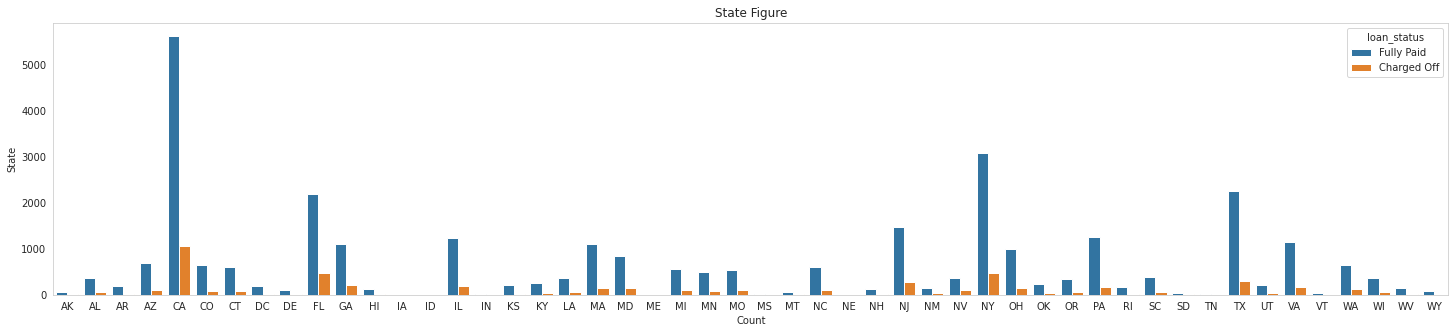

In [178]:
# States
plt.figure(figsize=(25,5))
sns.countplot(loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('State Figure',fontsize=12)
plt.show()

**Conclusion:** Majority of the borrowers are from the urban cities like California, NewYork, Texas, Florida...

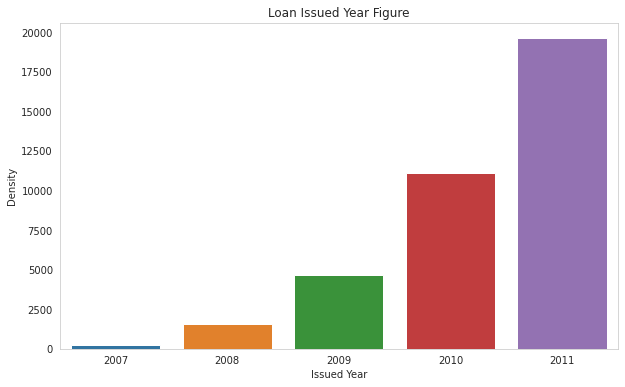

In [205]:
# Issued Year
plt.figure(figsize=(10,6))
sns.countplot(loan_data.year_issued)
plt.xlabel('Issued Year')
plt.ylabel('Density')
plt.title('Loan Issued Year Figure',fontsize=12)
plt.show()

**Conclusion:** The loan approval is increasing with the year/time.

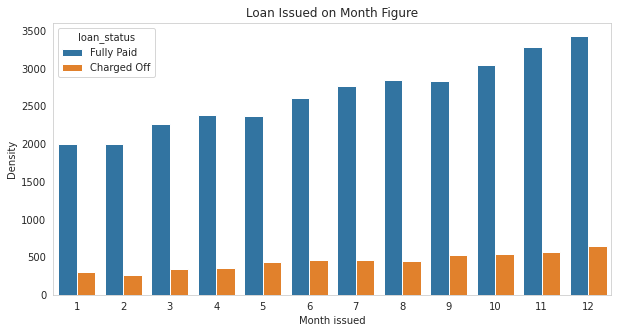

In [203]:
# Issued Month
plt.figure(figsize=(10,5))
sns.countplot(loan_data.month_issued,hue=loan_data.loan_status)
plt.xlabel('Month issued')
plt.ylabel('Density')
plt.title('Loan Issued on Month Figure',fontsize=12)
plt.show()

**Conclusion:** Last quater has majority of the loan dispersed.

**Segmented Univariate Analysis**

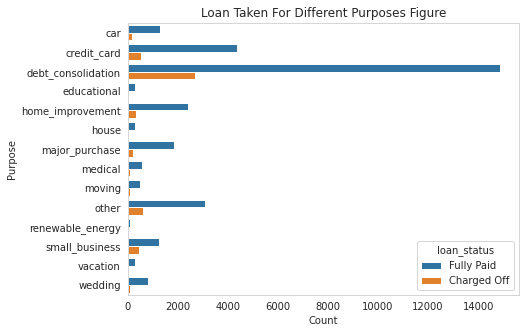

In [180]:
# Purpose based on loan_status 
plt.figure(figsize=(7,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes Figure',fontsize=12)
plt.show()

**Conclusion:** Debt Consolidation has the highest number of fully paid loan and defaulted loan.

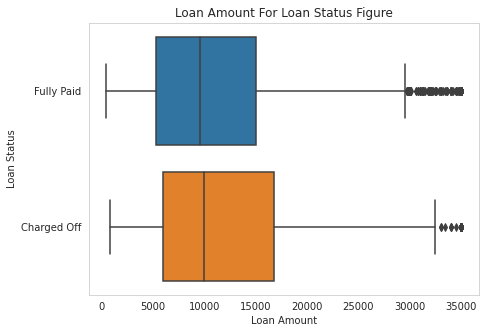

In [184]:
# Loan Amount For Loan Status
plt.figure(figsize=(7,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Loan Amount For Loan Status Figure',fontsize=12)
plt.show()

**Conclusion:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

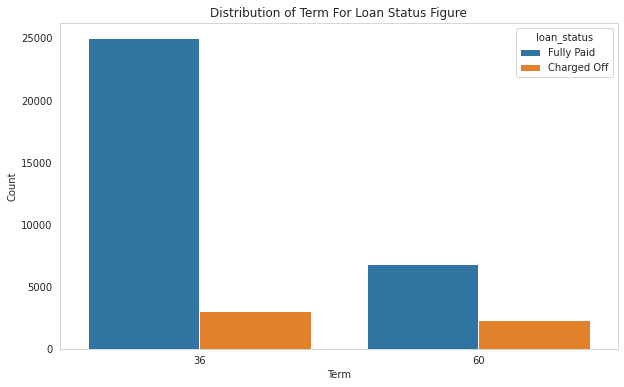

In [186]:
# Term based on loan_status
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status Figure',fontsize=12)
plt.show()

**Conclusion:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

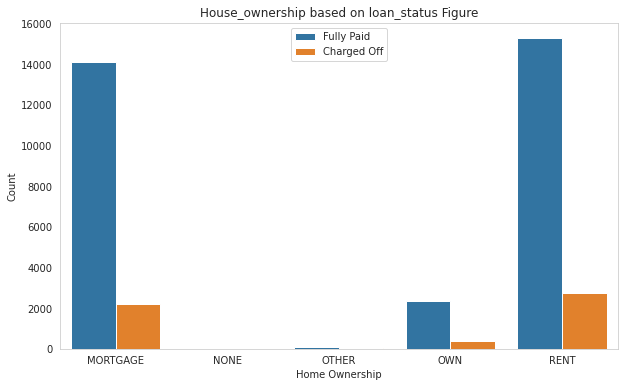

In [190]:
# House_ownership based on loan_status
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('House_ownership based on loan_status Figure',fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Conclusion:** The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.

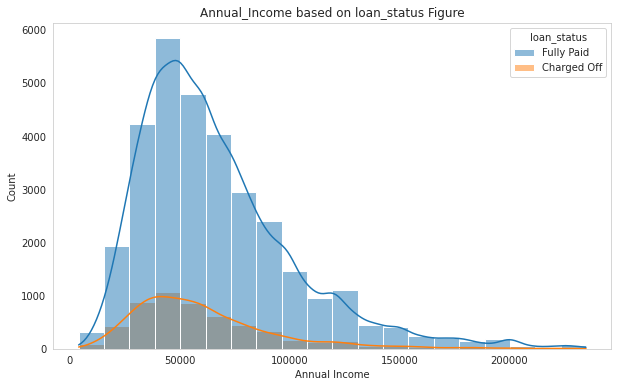

In [192]:
# Annual_inc based on loan_status
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual_Income based on loan_status Figure',fontsize=12)
plt.show()

**Conclusion:** Borrowers with less 50k annual income are more likely to default and higher annual income are less likely to default.

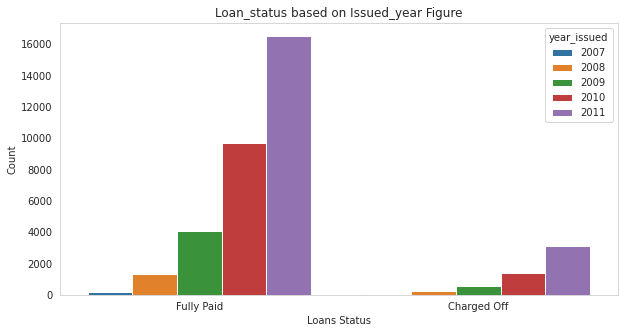

In [193]:
# Loan_status based on Issued_year
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='loan_status',hue='year_issued')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Loan_status based on Issued_year Figure',fontsize=12)
plt.show()

**Conclusion:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

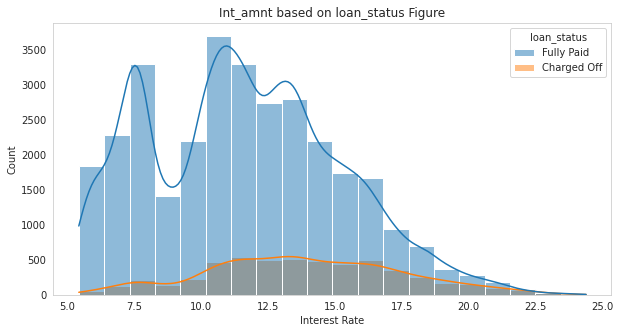

In [194]:
# Int_amnt based on loan_status
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Int_amnt based on loan_status Figure',fontsize=12)
plt.show()

**Conclusion:** The default loan amount increases with interest rate and shows are decline after 17.5 % interest rate.

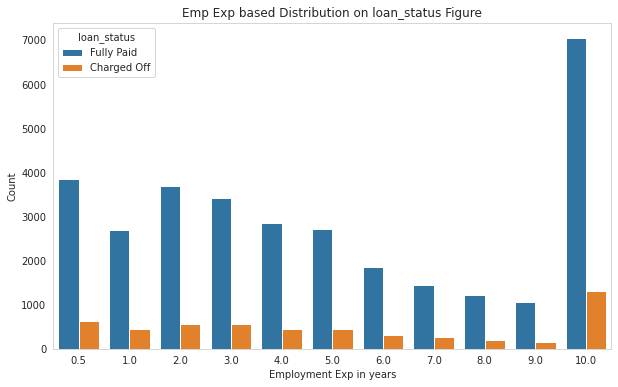

In [200]:
#Emp Exp based Distribution on loan_status
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Exp in years')
plt.ylabel('Count')
plt.title('Emp Exp based Distribution on loan_status Figure',fontsize=12)
plt.show()

**Conclusion:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

**Bivariate Analysis**

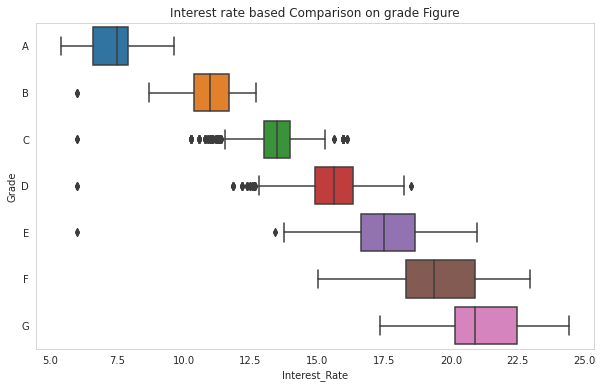

In [196]:
# Interest rate based Comparison on grade
plt.figure(figsize=(10,6))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest_Rate')
plt.ylabel('Grade')
plt.title('Interest rate based Comparison on grade Figure',fontsize=12)
plt.show()

**Conclusion:** The Grade represent risk factor thus we can say interst rate increases with the risk.

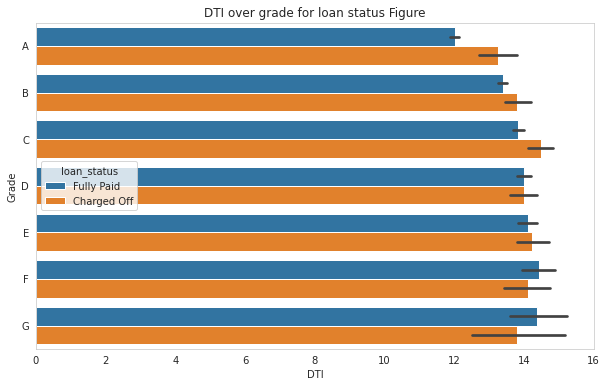

In [197]:
# DTI over grade for loan status
plt.figure(figsize=(10,6))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI over grade for loan status Figure',fontsize=12)
plt.show()

**Conclusion:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 720x432 with 0 Axes>

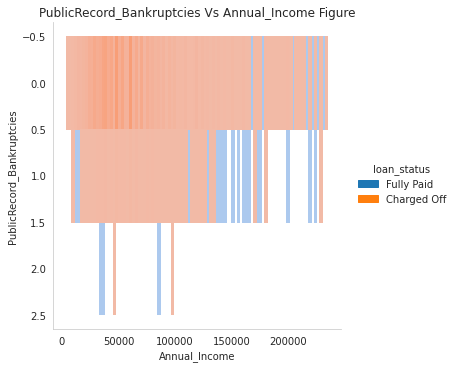

In [199]:
# PublicRecord_Bankruptcies Vs Annual_Income over loan status
plt.figure(figsize=(10,6))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual_Income')
plt.ylabel('PublicRecord_Bankruptcies')
plt.title('PublicRecord_Bankruptcies Vs Annual_Income Figure',fontsize=12)
plt.show()

**Conclusion:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

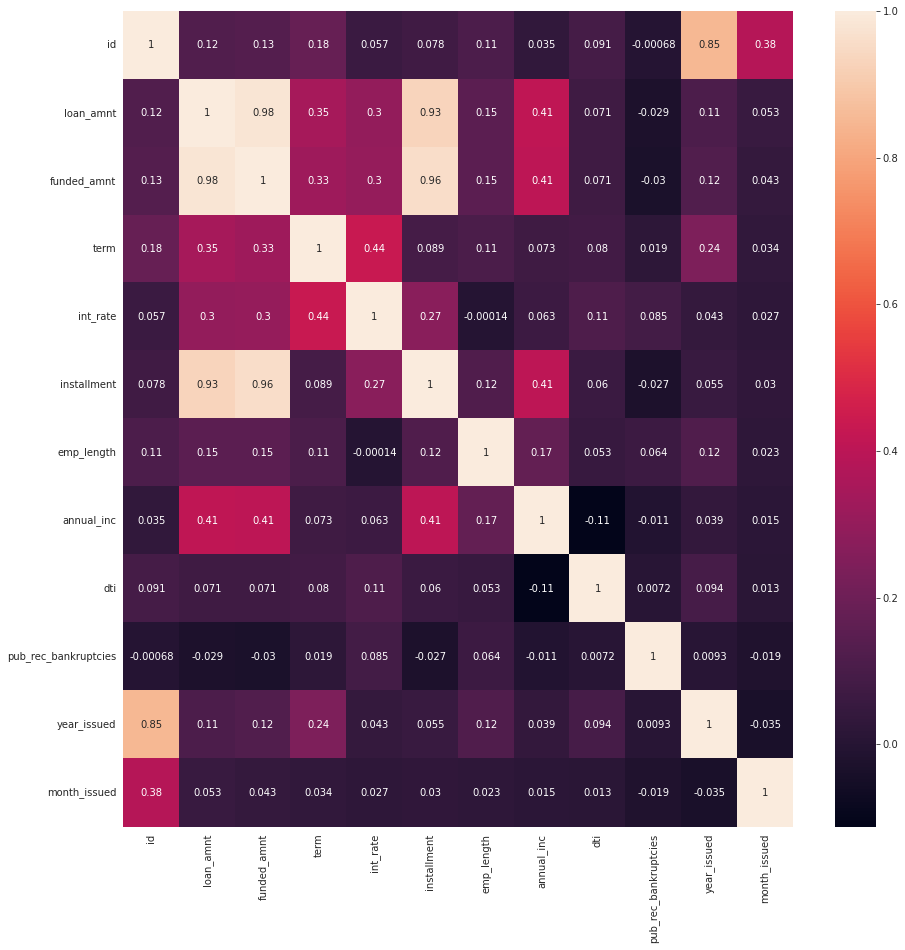

In [198]:
# Heatmap of correlation between variables
plt.figure(figsize=(15,15))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

**Analysis for defaulters:**


*   The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.
*   The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
*   The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
*   Borrowers with least grades like E,F,G which indicates high risk.
*   Maximum Borrowers with working experience 10+ years.
*   The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.
*   The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
*   Maximum Borrowers having annual income in the range 50000-100000.
*   Risk are with the Borrowers having Public Recorded Bankruptcy.
*   The Grade represent risk factor thus we can say interst rate increases with the risk.






